In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
iris = pd.read_csv('DataSets/iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.0,Iris-setosa
1,2,4.9,3.0,1.4,NaN,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
sample = iris.drop(columns = ['Id','Species'],axis = 'columns')
sample

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.0
1,4.9,3.0,1.4,NaN
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
sample.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     7
dtype: int64

In [6]:
sample.PetalWidthCm.fillna(0.0,inplace = True)
sample

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.0
1,4.9,3.0,1.4,0.0
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
sample.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [8]:
X = sample
y = iris.Species

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [11]:
clf.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_test

27         Iris-setosa
146     Iris-virginica
79     Iris-versicolor
93     Iris-versicolor
2          Iris-setosa
103     Iris-virginica
63     Iris-versicolor
7          Iris-setosa
89     Iris-versicolor
9          Iris-setosa
114     Iris-virginica
64     Iris-versicolor
22         Iris-setosa
88     Iris-versicolor
100     Iris-virginica
8          Iris-setosa
136     Iris-virginica
36         Iris-setosa
126     Iris-virginica
108     Iris-virginica
44         Iris-setosa
95     Iris-versicolor
35         Iris-setosa
4          Iris-setosa
104     Iris-virginica
33         Iris-setosa
28         Iris-setosa
116     Iris-virginica
115     Iris-virginica
1          Iris-setosa
Name: Species, dtype: object

In [13]:
clf.predict(X_test)

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [14]:
clf.score(X_test,y_test)

0.9666666666666667

In [15]:
y_predicted = clf.predict(X_test)
y_truth = y_test

In [16]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_truth,y_predicted)
cm

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  9]], dtype=int64)

Text(33.0, 0.5, 'Truth')

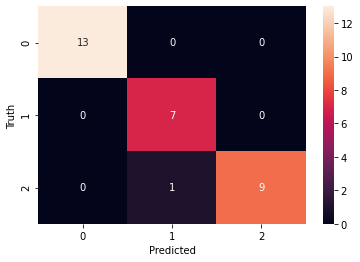

In [17]:
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')